In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
mvp_df = pd.read_csv('data/mvp_df.csv')

In [3]:
mvp_df.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Julius Erving,30,PHI,28.0,454.0,690,0.658,82,35.0,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1981
1,2,Larry Bird,24,BOS,20.0,423.0,690,0.613,82,39.5,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,1981
2,3,Kareem Abdul-Jabbar,33,LAL,8.0,286.0,690,0.414,80,37.2,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,1981
3,4,Moses Malone,25,HOU,8.0,180.0,690,0.261,80,40.6,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,1981
4,5,George Gervin,28,SAS,1.0,83.0,690,0.120,82,33.7,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,1981


In [4]:
mvp_votes_df = mvp_df[['Player', 'Year','Pts Won', 'Pts Max', "Share"]]

In [5]:
mvp_votes_df.head()

,Player,Year,Pts Won,Pts Max,Share
0,Julius Erving,1981,454.0,690,0.658
1,Larry Bird,1981,423.0,690,0.613
2,Kareem Abdul-Jabbar,1981,286.0,690,0.414
3,Moses Malone,1981,180.0,690,0.261
4,George Gervin,1981,83.0,690,0.120


In [217]:
mvp_votes_df.sort_values(by = 'Share', ascending = False)[:10]
mvp_votes_df["Player(Year)"] = mvp_votes_df["Player"] + " (" + mvp_votes_df["Year"].astype(str)+")"

/var/folders/h9/gwl1hr8n5_x6kwzstxs78nx40000gn/T/ipykernel_29836/1806272882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_votes_df["Player(Year)"] = mvp_votes_df["Player"] + " (" + mvp_votes_df["Year"].astype(str)+")"


In [256]:
mvp_votes_df["Share_percent"] = mvp_votes_df["Share"] * 100

/var/folders/h9/gwl1hr8n5_x6kwzstxs78nx40000gn/T/ipykernel_29836/905319101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_votes_df["Share_percent"] = mvp_votes_df["Share"] * 100


In [257]:
mvp_votes_df

,Player,Year,Pts Won,Pts Max,Share,Player(Year),Share_percent
0,Julius Erving,1981,454.0,690,0.658,Julius Erving (1981),65.8
1,Larry Bird,1981,423.0,690,0.613,Larry Bird (1981),61.3
2,Kareem Abdul-Jabbar,1981,286.0,690,0.414,Kareem Abdul-Jabbar (1981),41.4
3,Moses Malone,1981,180.0,690,0.261,Moses Malone (1981),26.1
4,George Gervin,1981,83.0,690,0.120,George Gervin (1981),12.0
...,...,...,...,...,...,...,...
683,Stephen Curry,2022,4.0,1000,0.004,Stephen Curry (2022),0.4
684,Chris Paul,2022,2.0,1000,0.002,Chris Paul (2022),0.2
685,DeMar DeRozan,2022,1.0,1000,0.001,DeMar DeRozan (2022),0.1
686,Kevin Durant,2022,1.0,1000,0.001,Kevin Durant (2022),0.1


In [258]:
highest_votes_share = mvp_votes_df.sort_values(by = 'Share_percent', ascending = False)[:10]

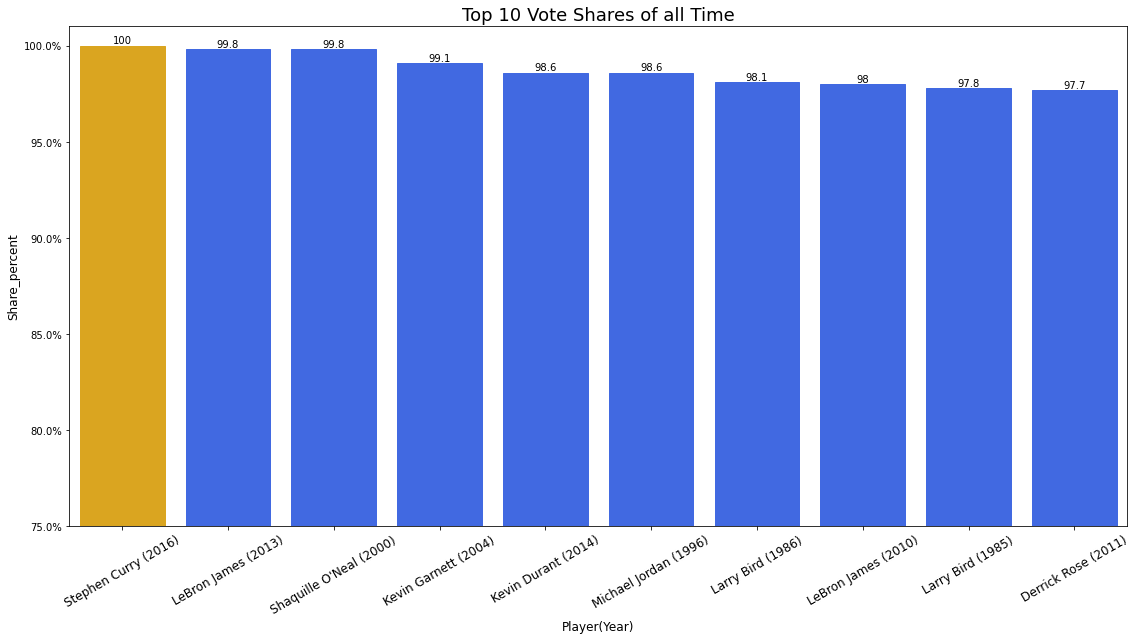

In [436]:
plt.figure(figsize = (16,9))
plt.title("Top 10 Vote Shares of all Time", fontsize = 18)
plt.xlabel("Player(Year)", fontsize = 12)
plt.ylabel("MVP voter share", fontsize = 12)
plt.xticks(fontsize = 12, rotation = 30)
plt.ylim(75,101)
ax = sns.barplot(data = highest_votes_share, x = 'Player(Year)', y = 'Share_percent',errwidth=0)

for i in ax.containers:
    ax.bar_label(i, label_type= 'edge')
for bar in ax.patches:
    if bar.get_height()>99.9:
        bar.set_color('goldenrod')
    else:
        bar.set_color('royalblue')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig('images/top_vote_getters.png')

The only unanimous winner is Stephen Curry for the 2016 season.  NBA legends that round out the rest of the list, 2013-Lebron James, 2000-Shaq, 2004-KG and 2014-Kevin Durant. 

In [214]:
coefficient_table

,Coefficients,features
13,0.159433,eFG%
29,0.065329,W/L%
49,0.029194,WS/48
18,0.026823,DRB
53,0.025355,VORP
16,0.019836,FT%
15,0.018634,FTA
5,0.017677,FGA
23,0.014241,TOV
10,0.013642,2P


In [6]:
players_df = pd.read_csv('data/players.csv')

In [7]:
players_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,33,LAL,80,NaN,37.2,10.5,18.2,...,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,1981
1,2,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,...,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981
2,2,Tom Abernethy,SF,26,GSW,10,NaN,3.9,0.1,0.3,...,0.1,0.7,0.8,0.1,0.1,0.0,0.2,0.5,0.4,1981
3,2,Tom Abernethy,SF,26,IND,29,NaN,8.9,0.8,1.9,...,0.7,0.7,1.4,0.6,0.2,0.1,0.2,1.0,2.0,1981
4,3,Alvan Adams,C,26,PHO,75,NaN,27.4,6.1,11.6,...,2.1,5.2,7.3,4.6,1.4,0.9,3.0,3.0,14.9,1981


In [8]:
players_df.drop(columns='Rk', inplace= True)

In [9]:
players_df.head(2)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,33,LAL,80,NaN,37.2,10.5,18.2,.574,...,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,1981
1,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,.424,...,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981


In [10]:
players_df['Player'].head(25)

0     Kareem Abdul-Jabbar*
1            Tom Abernethy
2            Tom Abernethy
3            Tom Abernethy
4              Alvan Adams
5           Darrell Allums
6          Tiny Archibald*
7            Dennis Awtrey
8             James Bailey
9             Greg Ballard
10             Mike Bantom
11         Billy Ray Bates
12             Mel Bennett
13             Kent Benson
14             Henry Bibby
15             Larry Bird*
16           Otis Birdsong
17            Norman Black
18               Ron Boone
19          Winford Boynes
20          Dudley Bradley
21              Mike Bratz
22              Jim Brewer
23              Ron Brewer
24              Ron Brewer
Name: Player, dtype: object

In [11]:
players_df["Player"] = players_df['Player'].str.replace("*","", regex = False)

In [282]:
players_df.head(30)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,.574,0.0,0.0,.000,10.5,18.2,.574,.574,5.3,6.9,.766,2.5,7.8,10.3,3.4,0.7,2.9,3.1,3.1,26.2,1981
1,Tom Abernethy,SF,26,TOT,39,NaN,7.6,0.6,1.5,.424,0.0,0.0,.000,0.6,1.5,.431,.424,0.3,0.6,.591,0.5,0.7,1.2,0.5,0.2,0.1,0.2,0.9,1.6,1981
2,Tom Abernethy,SF,26,GSW,10,NaN,3.9,0.1,0.3,.333,0.0,0.0,NaN,0.1,0.3,.333,.333,0.2,0.3,.667,0.1,0.7,0.8,0.1,0.1,0.0,0.2,0.5,0.4,1981
3,Tom Abernethy,SF,26,IND,29,NaN,8.9,0.8,1.9,.429,0.0,0.0,.000,0.8,1.9,.436,.429,0.4,0.7,.579,0.7,0.7,1.4,0.6,0.2,0.1,0.2,1.0,2.0,1981
4,Alvan Adams,C,26,PHO,75,NaN,27.4,6.1,11.6,.526,0.0,0.0,NaN,6.1,11.6,.526,.526,2.7,3.5,.768,2.1,5.2,7.3,4.6,1.4,0.9,3.0,3.0,14.9,1981
5,Darrell Allums,PF,22,DAL,22,NaN,12.5,1.0,3.0,.343,0.0,0.0,.000,1.0,3.0,.348,.343,0.6,1.0,.591,0.9,2.1,3.0,1.1,0.2,0.4,1.0,2.3,2.7,1981
6,Tiny Archibald,PG,32,BOS,80,72,35.3,4.8,9.6,.499,0.0,0.1,.000,4.8,9.5,.505,.499,4.3,5.2,.816,0.5,1.8,2.2,7.7,0.9,0.2,3.3,2.5,13.8,1981
7,Dennis Awtrey,C,32,SEA,47,NaN,12.9,0.9,2.0,.473,0.0,0.0,NaN,0.9,2.0,.473,.473,0.3,0.4,.700,0.7,1.6,2.3,1.1,0.3,0.2,0.7,1.8,2.2,1981
8,James Bailey,PF,23,SEA,82,NaN,31.0,5.4,10.8,.499,0.0,0.0,.500,5.4,10.8,.499,.500,3.1,4.4,.709,2.3,5.1,7.4,1.2,0.9,1.7,2.7,4.0,14.0,1981
9,Greg Ballard,SF,26,WSB,82,NaN,31.8,6.7,14.5,.463,0.1,0.4,.219,6.6,14.1,.470,.466,2.0,2.4,.847,2.0,5.0,7.1,2.4,1.4,0.5,1.4,2.4,15.5,1981


In [13]:
players_df.groupby(["Player","Year"])

In [14]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

In [15]:
players_single_row = players_df.groupby(["Player","Year"]).apply(single_row)

In [16]:
players_single_row.head()

Player Pos Age   Tm   G  GS    MP   FG  FGA   FG%  \
Player     Year                                                               
A.C. Green 1986 2018  A.C. Green  PF  22  LAL  82   1  18.8  2.5  4.7  .539   
           1987 2417  A.C. Green  PF  23  LAL  79  72  28.4  4.0  7.4  .538   
           1988 2819  A.C. Green  PF  24  LAL  82  64  32.1  3.9  7.8  .503   
           1989 3268  A.C. Green  PF  25  LAL  82  82  30.6  4.9  9.2  .529   
           1990 3730  A.C. Green  PF  26  LAL  82  82  33.0  4.7  9.8  .478   

                      ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
Player     Year       ...                                                      
A.C. Green 1986 2018  ...  2.0  2.7  4.6  0.7  0.6  0.6  1.2  2.8   6.4  1986  
           1987 2417  ...  2.7  5.1  7.8  1.1  0.9  1.0  1.3  2.2  10.8  1987  
           1988 2819  ...  3.0  5.7  8.7  1.1  1.1  0.5  1.5  2.5  11.4  1988  
           1989 3268  ...  3.1  5.9  9.0  1.3  1.1  0.7  1.5  2.1  13.3  1989  
           1990 3730  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4  2.5  12.9  1990  

[5 rows x 30 columns]

In [17]:
players_single_row.index = players_single_row.index.droplevel()
players_single_row.index = players_single_row.index.droplevel()

In [18]:
players_single_row[players_single_row["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2697,Greg Anderson,PF,23,SAS,82,45,24.2,4.6,9.2,.501,...,2.0,4.3,6.3,1.0,0.7,1.5,1.7,2.8,11.7,1988
3144,Greg Anderson,PF,24,SAS,82,56,29.3,5.6,11.1,.503,...,3.1,5.1,8.2,0.7,1.2,1.3,2.2,2.7,13.7,1989
3591,Greg Anderson,PF,25,MIL,60,28,21.5,3.7,7.2,.507,...,1.9,4.4,6.2,0.4,0.5,0.9,1.3,2.9,8.8,1990
4069,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
4528,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
5473,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
5972,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
6442,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
7009,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
7602,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [95]:
players_single_row

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2018,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
2417,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
2819,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
3268,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
3730,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10156,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
10656,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
11237,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
11837,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [19]:
combined_players = players_single_row.merge(mvp_votes_df, how = "outer", on = ["Player","Year"])

In [20]:
combined_players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,NaN,NaN,NaN
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,NaN,NaN,NaN
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,NaN,NaN,NaN
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,NaN,NaN,NaN
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN


In [21]:
combined_players[combined_players['Share']> .41]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
404,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
439,Alonzo Mourning,C,28,MIA,46,46,38.1,7.0,13.8,.511,...,1.6,0.7,3.9,3.0,3.5,20.1,1999,773.0,1180.0,0.655
856,Anthony Davis,PF,24,NOP,75,75,36.4,10.4,19.5,.534,...,2.3,1.5,2.6,2.2,2.1,28.1,2018,445.0,1010.0,0.441
1359,Bernard King,SF,27,NYK,77,76,34.6,10.3,18.1,.572,...,2.1,1.0,0.2,2.6,3.5,26.3,1984,373.0,760.0,0.491
2574,Charles Barkley,SF,26,PHI,79,79,39.1,8.9,14.9,.600,...,3.9,1.9,0.6,3.1,3.2,25.2,1990,614.0,920.0,0.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16398,Tim Duncan,PF,22,SAS,50,50,39.3,8.4,16.9,.495,...,2.4,0.9,2.5,2.9,2.9,21.7,1999,740.0,1180.0,0.627
16400,Tim Duncan,PF,24,SAS,82,82,38.7,8.6,17.1,.499,...,3.0,0.9,2.3,3.0,3.0,22.2,2001,706.0,1240.0,0.569
16401,Tim Duncan,PF,25,SAS,82,82,40.6,9.3,18.3,.508,...,3.7,0.7,2.5,3.2,2.6,25.5,2002,954.0,1260.0,0.757
16402,Tim Duncan,PF,26,SAS,81,81,39.3,8.8,17.2,.513,...,3.9,0.7,2.9,3.1,2.9,23.3,2003,962.0,1190.0,0.808


In [22]:
combined_players[["Pts Won", "Pts Max","Share"]] = combined_players[["Pts Won", "Pts Max","Share"]].fillna(0)

In [23]:
combined_players[combined_players["Pts Won"]>0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
157,Adrian Dantley,SF,25,UTA,80,NaN,42.7,11.4,20.3,.559,...,4.0,1.4,0.2,3.5,3.1,30.7,1981,15.0,690.0,0.022
158,Adrian Dantley,SF,26,UTA,81,81,39.8,11.2,19.6,.570,...,4.0,1.2,0.2,3.7,3.1,30.3,1982,7.0,690.0,0.010
160,Adrian Dantley,SF,28,UTA,79,79,37.8,10.2,18.2,.558,...,3.9,0.8,0.1,3.3,2.5,30.6,1984,88.0,760.0,0.116
162,Adrian Dantley,SF,30,UTA,76,75,36.1,10.8,19.1,.563,...,3.5,0.8,0.1,3.0,2.7,29.8,1986,2.0,780.0,0.003
164,Adrian Dantley,SF,32,DET,69,50,31.1,6.4,12.5,.514,...,2.5,0.6,0.1,2.0,2.1,20.0,1988,1.0,800.0,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17771,World B. Free,SG,30,CLE,75,71,31.7,8.3,18.8,.445,...,3.0,1.3,0.1,2.1,2.9,22.3,1984,1.0,760.0,0.001
17772,World B. Free,SG,31,CLE,71,50,31.7,8.6,18.7,.459,...,4.5,1.1,0.2,2.0,2.3,22.5,1985,2.0,780.0,0.003
17808,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001
17813,Yao Ming,C,28,HOU,77,77,33.6,7.4,13.4,.548,...,1.8,0.4,1.9,3.0,3.3,19.7,2009,1.0,1210.0,0.001


In [24]:
combined_players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.000
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.000
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.000
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17955,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.000
17956,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.000
17957,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.000
17958,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.3,0.2,0.7,0.8,2.0,4.7,2006,0.0,0.0,0.000


In [25]:
teams = pd.read_csv("data/teams.csv")

In [27]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,62,20,.756,—,109.9,104.0,6.05,1981,Boston Celtics*
1,62,20,.756,—,111.7,103.8,7.76,1981,Philadelphia 76ers*
2,50,32,.610,12.0,107.9,106.3,2.00,1981,New York Knicks*
3,39,43,.476,23.0,105.6,105.6,0.42,1981,Washington Bullets
4,24,58,.293,38.0,106.9,113.0,-5.15,1981,New Jersey Nets
5,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1981,Central Division
6,60,22,.732,—,113.1,105.9,7.14,1981,Milwaukee Bucks*
7,45,37,.549,15.0,109.0,107.0,2.34,1981,Chicago Bulls*
8,44,38,.537,16.0,107.6,106.2,1.72,1981,Indiana Pacers*
9,31,51,.378,29.0,104.9,108.0,-2.37,1981,Atlanta Hawks


In [28]:
teams = teams[~teams["W"].str.contains("Division")]

In [29]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,62,20,.756,—,109.9,104.0,6.05,1981,Boston Celtics*
1,62,20,.756,—,111.7,103.8,7.76,1981,Philadelphia 76ers*
2,50,32,.610,12.0,107.9,106.3,2.00,1981,New York Knicks*
3,39,43,.476,23.0,105.6,105.6,0.42,1981,Washington Bullets
4,24,58,.293,38.0,106.9,113.0,-5.15,1981,New Jersey Nets
6,60,22,.732,—,113.1,105.9,7.14,1981,Milwaukee Bucks*
7,45,37,.549,15.0,109.0,107.0,2.34,1981,Chicago Bulls*
8,44,38,.537,16.0,107.6,106.2,1.72,1981,Indiana Pacers*
9,31,51,.378,29.0,104.9,108.0,-2.37,1981,Atlanta Hawks
10,28,54,.341,32.0,105.7,110.6,-4.15,1981,Cleveland Cavaliers


In [32]:
teams["Team"] = teams["Team"].str.replace("*","",regex = False)

/var/folders/h9/gwl1hr8n5_x6kwzstxs78nx40000gn/T/ipykernel_29836/3645373603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*","",regex = False)


In [33]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,62,20,.756,—,109.9,104.0,6.05,1981,Boston Celtics
1,62,20,.756,—,111.7,103.8,7.76,1981,Philadelphia 76ers
2,50,32,.610,12.0,107.9,106.3,2.00,1981,New York Knicks
3,39,43,.476,23.0,105.6,105.6,0.42,1981,Washington Bullets
4,24,58,.293,38.0,106.9,113.0,-5.15,1981,New Jersey Nets
6,60,22,.732,—,113.1,105.9,7.14,1981,Milwaukee Bucks
7,45,37,.549,15.0,109.0,107.0,2.34,1981,Chicago Bulls
8,44,38,.537,16.0,107.6,106.2,1.72,1981,Indiana Pacers
9,31,51,.378,29.0,104.9,108.0,-2.37,1981,Atlanta Hawks
10,28,54,.341,32.0,105.7,110.6,-4.15,1981,Cleveland Cavaliers


In [37]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Milwaukee Bucks',
       'Chicago Bulls', 'Indiana Pacers', 'Atlanta Hawks',
       'Cleveland Cavaliers', 'Detroit Pistons', 'San Antonio Spurs',
       'Kansas City Kings', 'Houston Rockets', 'Denver Nuggets',
       'Utah Jazz', 'Dallas Mavericks', 'Phoenix Suns',
       'Los Angeles Lakers', 'Portland Trail Blazers',
       'Golden State Warriors', 'San Diego Clippers',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Minnesota Timberwolves', 'Toronto Raptors', 'Vancouver Grizzlies',
       'Washington Wizards', 'Memphis Grizzlies', 'New Orleans Hornets',
       'Charlotte Bobcats', 'New Orleans/Oklahoma City Hornets',
       'Oklahoma City Thunder', 'Brooklyn Nets', 'New Orleans Pelicans'],
      dtype=object)

In [38]:
combined_players["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'SDC', 'NOP',
       'BRK', 'SAS', 'CHH', 'KCK', nan], dtype=object)

In [39]:
nicknames = {}

with open('data/abbrevs.txt') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(',')
        nicknames[abbrev] = name

In [40]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'KCK': 'Kansas City Kings',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kin

In [41]:
combined_players["Team"] = combined_players["Tm"].map(nicknames)

In [42]:
combined_players.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers


In [43]:
all_stats = combined_players.merge(teams, how = "outer", on = ["Team", "Year"])

In [44]:
all_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.0,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,.513,...,0.0,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,.579,...,780.0,0.009,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,.667,...,0.0,0.000,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,.564,...,780.0,0.173,Los Angeles Lakers,62,20,.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17955,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
17956,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
17957,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
17958,Tony Snell,SG,25,MIL,80,80,29.2,3.1,6.8,.455,...,0.0,0.000,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [45]:
all_stats[all_stats["Player"] =="George Johnson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
15648,George Johnson,SF,27,IND,81,20,25.6,5.1,10.9,.465,...,0.0,0.000,Indiana Pacers,26,56,.317,24.0,104.5,109.3,-4.25
17959,George Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
all_stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [47]:
all_stats = all_stats.apply(pd.to_numeric, errors = 'ignore')

In [48]:
all_stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [50]:
all_stats['GB'].value_counts()

—       3275
11.0     558
12.0     519
20.0     496
15.0     495
        ... 
53.0      15
22.5      15
20.5      14
4.5       14
47.0      13
Name: GB, Length: 67, dtype: int64

In [51]:
all_stats['GB'] = all_stats['GB'].str.replace('—','0')

In [52]:
all_stats['GB'].value_counts()

0       3275
11.0     558
12.0     519
20.0     496
15.0     495
        ... 
53.0      15
22.5      15
20.5      14
4.5       14
47.0      13
Name: GB, Length: 67, dtype: int64

In [53]:
all_stats['GB'] = pd.to_numeric(all_stats['GB'])

In [54]:
all_stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [58]:
all_stats.to_csv("data/player_mvp_stats.csv", index=False)

## EDA

In [291]:
all_stats["Player(Year)"] = all_stats["Player"] + " (" + all_stats["Year"].astype(str)+")"

In [292]:
all_stats[all_stats["G"]>55].sort_values("PTS", ascending = False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Player(Year)
12460,Michael Jordan,SG,23.0,CHI,82.0,82.0,40.0,13.4,27.8,0.482,0.1,0.8,0.182,13.2,27.0,0.491,0.484,10.2,11.9,0.857,2.0,3.2,5.2,4.6,2.9,1.5,3.3,2.9,37.1,1987,449.0,780.0,0.576,Chicago Bulls,40.0,42.0,0.488,17.0,104.8,103.9,1.26,Michael Jordan (1987)
11681,James Harden,PG,29.0,HOU,78.0,78.0,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,776.0,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96,James Harden (2019)
1180,Kobe Bryant,SG,27.0,LAL,80.0,80.0,41.0,12.2,27.2,0.450,2.3,6.5,0.347,10.0,20.7,0.482,0.491,8.7,10.2,0.850,0.9,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,2006,483.0,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53,Kobe Bryant (2006)
14745,Michael Jordan,SG,24.0,CHI,82.0,82.0,40.4,13.0,24.4,0.535,0.1,0.6,0.132,13.0,23.7,0.546,0.537,8.8,10.5,0.841,1.7,3.8,5.5,5.9,3.2,1.6,3.1,3.3,35.0,1988,665.0,800.0,0.831,Chicago Bulls,50.0,32.0,0.610,4.0,105.0,101.6,3.76,Michael Jordan (1988)
11698,James Harden,SG,30.0,HOU,68.0,68.0,36.5,9.9,22.3,0.444,4.4,12.4,0.355,5.5,9.9,0.556,0.543,10.2,11.8,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,2020,367.0,1010.0,0.363,Houston Rockets,44.0,28.0,0.611,0.0,117.8,114.8,3.13,James Harden (2020)
11990,Michael Jordan,SG,26.0,CHI,82.0,82.0,39.0,12.6,24.0,0.526,1.1,3.0,0.376,11.5,21.0,0.548,0.550,7.2,8.5,0.848,1.7,5.1,6.9,6.3,2.8,0.7,3.0,2.9,33.6,1990,564.0,920.0,0.613,Chicago Bulls,55.0,27.0,0.671,4.0,109.5,106.2,2.74,Michael Jordan (1990)
5369,Allen Iverson,PG,30.0,PHI,72.0,72.0,43.1,11.3,25.3,0.447,1.0,3.1,0.323,10.3,22.2,0.465,0.467,9.4,11.5,0.814,0.6,2.6,3.2,7.4,1.9,0.1,3.4,1.7,33.0,2006,1.0,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10,Allen Iverson (2006)
12027,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,0.495,1.0,2.9,0.352,11.7,22.7,0.514,0.515,6.1,7.3,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6,1993,565.0,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19,Michael Jordan (1993)
12951,Michael Jordan,SG,25.0,CHI,81.0,81.0,40.2,11.9,22.2,0.538,0.3,1.2,0.276,11.6,21.0,0.553,0.546,8.3,9.8,0.850,1.8,6.2,8.0,8.0,2.9,0.8,3.6,3.0,32.5,1989,598.8,850.0,0.704,Chicago Bulls,47.0,35.0,0.573,16.0,106.4,105.0,2.13,Michael Jordan (1989)
17578,George Gervin,SG,29.0,SAS,79.0,79.0,35.7,12.6,25.2,0.500,0.1,0.5,0.278,12.4,24.7,0.504,0.502,7.0,8.1,0.864,1.7,3.2,5.0,2.4,1.0,0.6,2.7,2.7,32.3,1982,110.0,690.0,0.159,San Antonio Spurs,48.0,34.0,0.585,0.0,113.1,110.8,1.79,George Gervin (1982)


In [295]:
highest_scoring_avg = all_stats[all_stats["G"]>65].sort_values("PTS", ascending = False)

In [299]:
highest_scoring_avg = highest_scoring_avg[:10]

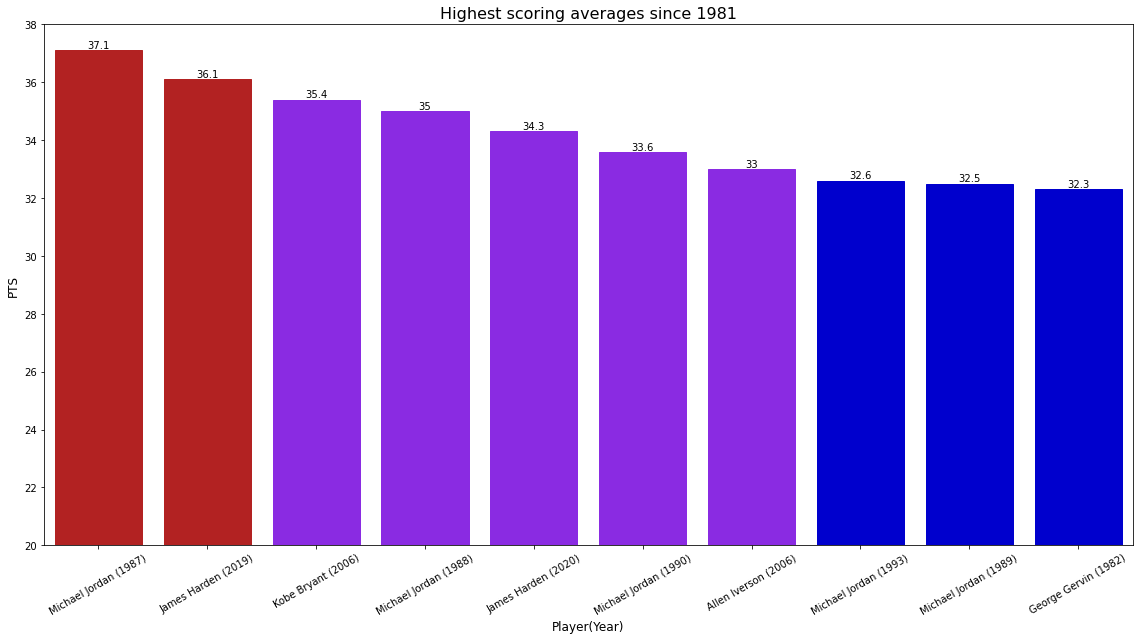

In [437]:
plt.figure(figsize = (16,9))
plt.title("Highest scoring averages since 1981", fontsize = 16)
plt.xlabel("Player",fontsize = 12)
plt.ylabel("PPG", fontsize = 12)
plt.ylim(20,38)
plt.xticks(rotation = 30)
ax_2 = sns.barplot(data=highest_scoring_avg, x= "Player(Year)", y = "PTS", color = 'mediumseagreen')
for i in ax_2.containers:
    ax_2.bar_label(i, label_type= 'edge')
for bar in ax_2.patches:
    if bar.get_height()>36:
        bar.set_color('firebrick')
    elif bar.get_height()>=33:
        bar.set_color('blueviolet')
    else:
        bar.set_color('mediumblue')
plt.tight_layout()
plt.savefig('images/high_scoring_averages.png');

Michael Jordan makes this list 5 times, leading the charge with a 37.1 ppg season.  Other notables are James Harden, Kobe Bryant, Allen Iverson, and the Iceman George Gervin.  

In [66]:
all_stats.groupby("Year").apply(lambda x:x.sort_values("PTS", ascending = False).head(1))

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1981,2344,Adrian Dantley,SF,25.0,UTA,80.0,NaN,42.7,11.4,20.3,0.559,...,690.0,0.022,Utah Jazz,28.0,54.0,0.341,24.0,101.2,107.1,-5.99
1982,17578,George Gervin,SG,29.0,SAS,79.0,79.0,35.7,12.6,25.2,0.500,...,690.0,0.159,San Antonio Spurs,48.0,34.0,0.585,0.0,113.1,110.8,1.79
1983,2372,Adrian Dantley,SF,27.0,UTA,22.0,22.0,40.3,10.6,18.3,0.580,...,0.0,0.000,Utah Jazz,30.0,52.0,0.366,23.0,109.0,113.2,-4.22
1984,2385,Adrian Dantley,SF,28.0,UTA,79.0,79.0,37.8,10.2,18.2,0.558,...,760.0,0.116,Utah Jazz,45.0,37.0,0.549,0.0,115.0,113.8,0.81
1985,12800,Bernard King,SF,28.0,NYK,55.0,55.0,37.5,12.6,23.7,0.530,...,780.0,0.090,New York Knicks,24.0,58.0,0.293,39.0,105.2,109.8,-4.09
1986,10443,Dominique Wilkins,SF,26.0,ATL,78.0,78.0,39.1,11.4,24.3,0.468,...,780.0,0.522,Atlanta Hawks,50.0,32.0,0.610,7.0,108.6,106.2,2.59
1987,12460,Michael Jordan,SG,23.0,CHI,82.0,82.0,40.0,13.4,27.8,0.482,...,780.0,0.576,Chicago Bulls,40.0,42.0,0.488,17.0,104.8,103.9,1.26
1988,14745,Michael Jordan,SG,24.0,CHI,82.0,82.0,40.4,13.0,24.4,0.535,...,800.0,0.831,Chicago Bulls,50.0,32.0,0.610,4.0,105.0,101.6,3.76
1989,12951,Michael Jordan,SG,25.0,CHI,81.0,81.0,40.2,11.9,22.2,0.538,...,850.0,0.704,Chicago Bulls,47.0,35.0,0.573,16.0,106.4,105.0,2.13


In [85]:
all_stats.corr()["Share"].sort_values(ascending = False)

Share      1.000000
Pts Won    0.985668
Pts Max    0.515374
FT         0.323144
FTA        0.323034
PTS        0.292717
FG         0.278888
2P         0.276551
2PA        0.253351
FGA        0.252946
TOV        0.237048
DRB        0.222652
AST        0.205069
TRB        0.199610
STL        0.186410
GS         0.173228
MP         0.170010
BLK        0.151948
W/L%       0.129477
W          0.126793
SRS        0.123575
ORB        0.122275
G          0.091225
3PA        0.082292
3P         0.081697
PF         0.074688
FG%        0.070495
2P%        0.066255
eFG%       0.063180
FT%        0.046388
PS/G       0.046314
Age        0.018899
3P%        0.011483
Year      -0.016572
PA/G      -0.032911
GB        -0.105084
L         -0.125219
Name: Share, dtype: float64

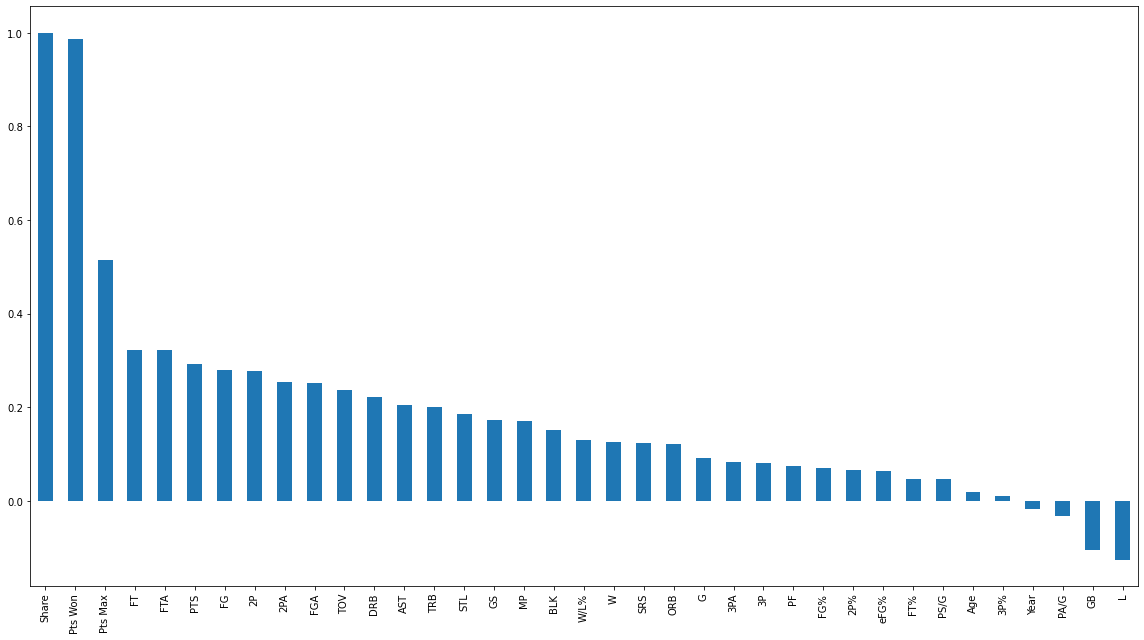

In [439]:
plt.figure(figsize=(16,9))
all_stats.corr()["Share"].sort_values(ascending = False).plot.bar()
plt.tight_layout()
plt.savefig('images/correlated_features.png');

In [357]:
all_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Player(Year)
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,A.C. Green (1986)
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,Byron Scott (1986)
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,7.0,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,James Worthy (1986)
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,NaN,2.0,3.0,0.667,0.667,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,Jerome Henderson (1986)
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,135.0,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,Kareem Abdul-Jabbar (1986)


In [425]:
highest_ft_shooters = all_stats[(all_stats['G']> 65.0) & (all_stats['FTA']> 3)].sort_values(by ="FT%", ascending = False)[:10]

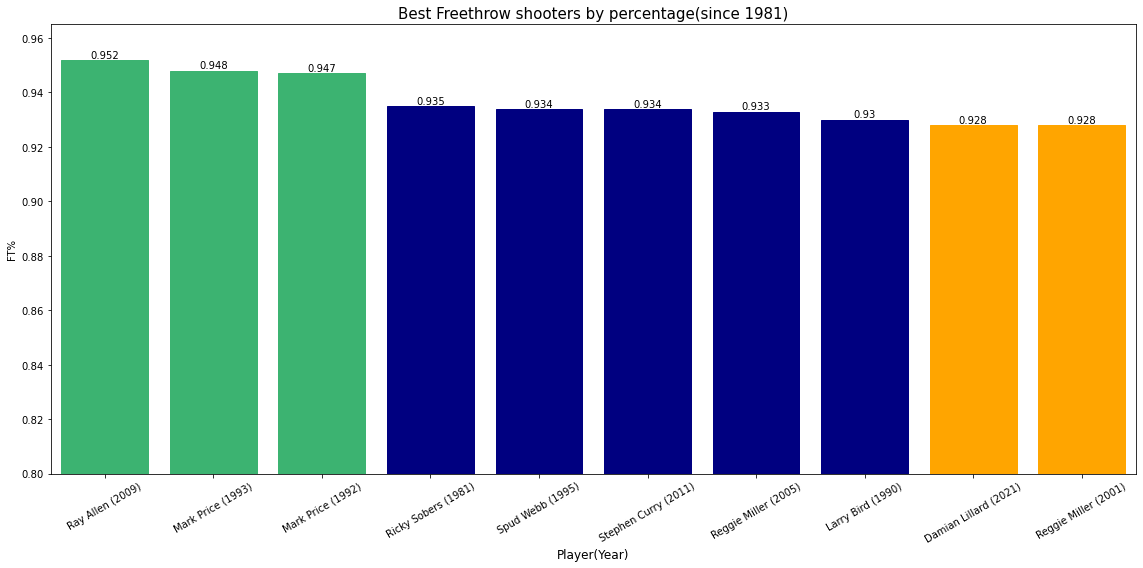

In [426]:
plt.figure(figsize = (16,8))
plt.title("Best Freethrow shooters by percentage(since 1981)", fontsize = 15)
plt.xlabel("Players", fontsize = 12)
plt.xticks(rotation = 30)
plt.ylim(.8,.965)
ax_3 = sns.barplot(data = highest_ft_shooters,x='Player(Year)',y = 'FT%')
for i in ax_3.containers:
    ax_3.bar_label(i, label_type= 'edge')
for bar in ax_3.patches:
    if bar.get_height()>.94:
        bar.set_color('mediumseagreen')
    elif bar.get_height()>=.93:
        bar.set_color('navy')
    else:
        bar.set_color('orange')
plt.tight_layout();


Hopefully a name that does not get lost in history is Mark Price, a extremely solid point guard who was an exceptional overall shooter, in this particular case he was also a terrific free throw shooter shooting over 94% in 92 and then again in 93.   Other familiar sharpshooters are Walter Ray Allen, Stephen Curry, Larry Bird Damian Lillard and Reggie Miller.  These guys all topped out at over 92% Freethrow percentage.

In [420]:
highest_assist = all_stats[(all_stats['G']> 65.0)].sort_values(by ="AST", ascending = False)[:10]

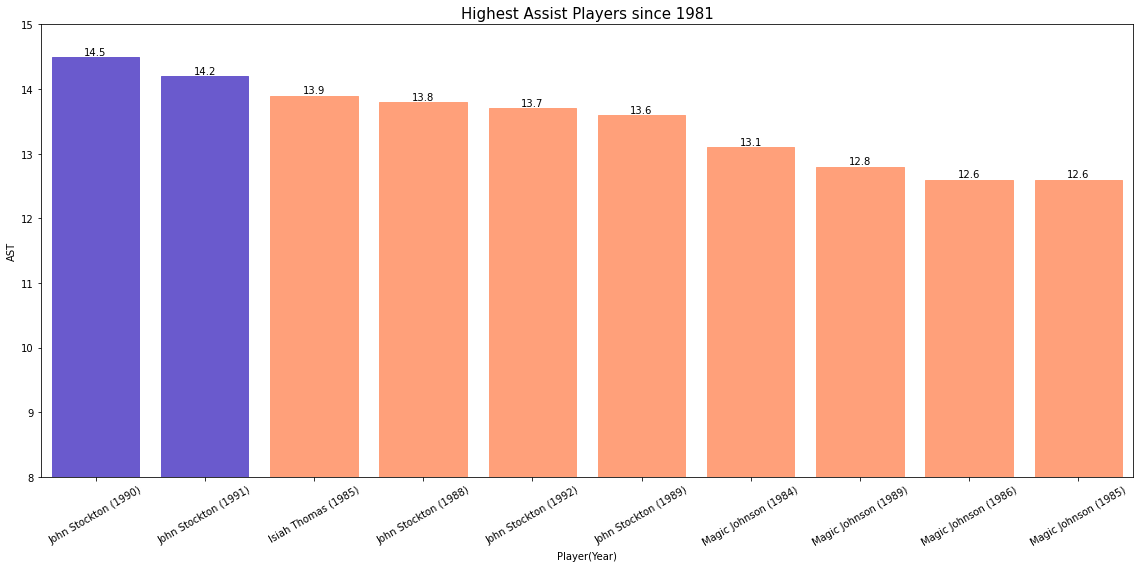

In [441]:
plt.figure(figsize = (16,8))
plt.title("Highest Assist Players since 1981",fontsize = 15)
plt.xticks(rotation=30)
plt.ylim(8, 15)
ax_4 = sns.barplot(data=highest_assist, x ="Player(Year)",y="AST")
for i in ax_4.containers:
    ax_4.bar_label(i, label_type= 'edge')

for bar in ax_4.patches:
    if bar.get_height()>14:
        bar.set_color('slateblue')
    else:
        bar.set_color('lightsalmon')
        
plt.tight_layout()
plt.savefig('images/topassist.png');

The assist list is topped by truly legendary point guards, lead by Stockton who in 1990 & 1991 cracked the 14 assist game mark.  Isiah Thomas & Magic Johnson also have some of the top assists since the 1981 season, they are all over 12.5 assists per game. 

In [125]:
advanced = pd.read_csv('data/advanced_stats.csv')

In [126]:
advanced.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar*,C,33,LAL,80,2976,25.5,.616,.001,.379,7.6,21.5,15.0,13.6,0.9,4.0,12.8,26.3,9.6,4.6,14.3,.230,4.7,1.4,6.1,6.1,1981
1,2,Tom Abernethy,SF,26,TOT,39,298,8.0,.459,.017,.373,7.1,10.6,8.8,8.0,1.1,0.6,10.4,10.3,0.2,0.2,0.4,.062,-2.2,-0.4,-2.6,0.0,1981
2,2,Tom Abernethy,SF,26,GSW,10,39,3.2,.463,.000,1.000,2.8,20.2,11.4,2.9,1.2,0.0,31.6,6.4,0.0,0.0,0.0,-0.004,-4.4,0.0,-4.4,0.0,1981
3,2,Tom Abernethy,SF,26,IND,29,259,8.7,.458,.018,.339,7.8,9.1,8.4,8.8,1.1,0.7,8.5,10.9,0.2,0.2,0.4,.072,-1.9,-0.4,-2.4,0.0,1981
4,3,Alvan Adams,C,26,PHO,75,2054,20.3,.567,.000,.298,8.6,20.5,14.7,24.5,2.4,1.9,18.7,23.0,3.3,4.5,7.7,.180,2.5,2.6,5.1,3.7,1981


In [442]:
highest_boards = all_stats[(all_stats['G']> 65.0)].sort_values(by ="TRB", ascending = False)[:10]

In [443]:
highest_boards

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Player(Year)
13169,Dennis Rodman,PF,30.0,DET,82.0,80.0,40.3,4.2,7.7,0.539,0.4,1.2,0.317,3.8,6.5,0.581,0.564,1.0,1.7,0.600,6.4,12.3,18.7,2.3,0.8,0.9,1.7,3.0,9.8,1992,26.0,960.0,0.027,Detroit Pistons,48.0,34.0,0.585,19.0,98.9,96.9,2.06,Dennis Rodman (1992)
10542,Dennis Rodman,PF,32.0,SAS,79.0,51.0,37.8,2.0,3.7,0.534,0.1,0.3,0.208,1.9,3.4,0.563,0.543,0.7,1.3,0.520,5.7,11.6,17.3,2.3,0.7,0.4,1.7,2.9,4.7,1994,1.0,1010.0,0.001,San Antonio Spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05,Dennis Rodman (1994)
7265,Andre Drummond,C,24.0,DET,78.0,78.0,33.7,6.0,11.3,0.529,0.0,0.1,0.000,6.0,11.2,0.536,0.529,3.1,5.1,0.605,5.1,10.9,16.0,3.0,1.5,1.6,2.6,3.2,15.0,2018,0.0,0.0,0.000,Detroit Pistons,39.0,43.0,0.476,11.0,103.8,103.9,-0.26,Andre Drummond (2018)
7284,Andre Drummond,C,25.0,DET,79.0,79.0,33.5,7.1,13.3,0.533,0.1,0.5,0.132,7.0,12.8,0.548,0.536,3.1,5.2,0.590,5.4,10.2,15.6,1.4,1.7,1.7,2.2,3.4,17.3,2019,0.0,0.0,0.000,Detroit Pistons,41.0,41.0,0.500,19.0,107.0,107.3,-0.56,Andre Drummond (2019)
4858,Kevin Willis,PF,29.0,ATL,81.0,80.0,36.6,7.3,15.1,0.483,0.1,0.5,0.162,7.2,14.7,0.493,0.485,3.6,4.5,0.804,5.2,10.4,15.5,2.1,0.9,0.7,2.4,2.8,18.3,1992,0.0,0.0,0.000,Atlanta Hawks,38.0,44.0,0.463,29.0,106.2,107.7,-1.15,Kevin Willis (1992)
12524,Ben Wallace,C,28.0,DET,73.0,73.0,39.4,2.9,6.0,0.481,0.0,0.1,0.167,2.9,5.9,0.485,0.482,1.2,2.6,0.450,4.0,11.4,15.4,1.6,1.4,3.2,1.2,2.5,6.9,2003,33.0,1190.0,0.028,Detroit Pistons,50.0,32.0,0.610,0.0,91.4,87.7,2.97,Ben Wallace (2003)
8708,Moses Malone,C,27.0,PHI,78.0,78.0,37.5,8.4,16.7,0.501,0.0,0.0,0.000,8.4,16.7,0.502,0.501,7.7,10.1,0.761,5.7,9.6,15.3,1.3,1.1,2.0,3.4,2.6,24.5,1983,720.0,750.0,0.960,Philadelphia 76ers,65.0,17.0,0.793,0.0,112.1,104.4,7.53,Moses Malone (1983)
10282,Kevin Love,PF,22.0,MIN,73.0,73.0,35.8,6.6,14.1,0.470,1.2,2.9,0.417,5.4,11.2,0.483,0.513,5.8,6.8,0.850,4.5,10.7,15.2,2.5,0.6,0.4,2.1,2.0,20.2,2011,0.0,0.0,0.000,Minnesota Timberwolves,17.0,65.0,0.207,38.0,101.1,107.7,-5.97,Kevin Love (2011)
11658,DeAndre Jordan,C,29.0,LAC,77.0,77.0,31.5,4.8,7.5,0.645,0.0,0.0,NaN,4.8,7.5,0.645,0.645,2.4,4.1,0.580,4.3,10.9,15.2,1.5,0.5,0.9,1.8,2.6,12.0,2018,0.0,0.0,0.000,Los Angeles Clippers,42.0,40.0,0.512,16.0,109.0,109.0,0.15,DeAndre Jordan (2018)
13276,Dennis Rodman,PF,36.0,CHI,80.0,66.0,35.7,1.9,4.5,0.431,0.1,0.3,0.174,1.9,4.2,0.448,0.436,0.8,1.4,0.550,5.3,9.8,15.0,2.9,0.6,0.2,1.8,3.0,4.7,1998,0.0,0.0,0.000,Chicago Bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24,Dennis Rodman (1998)


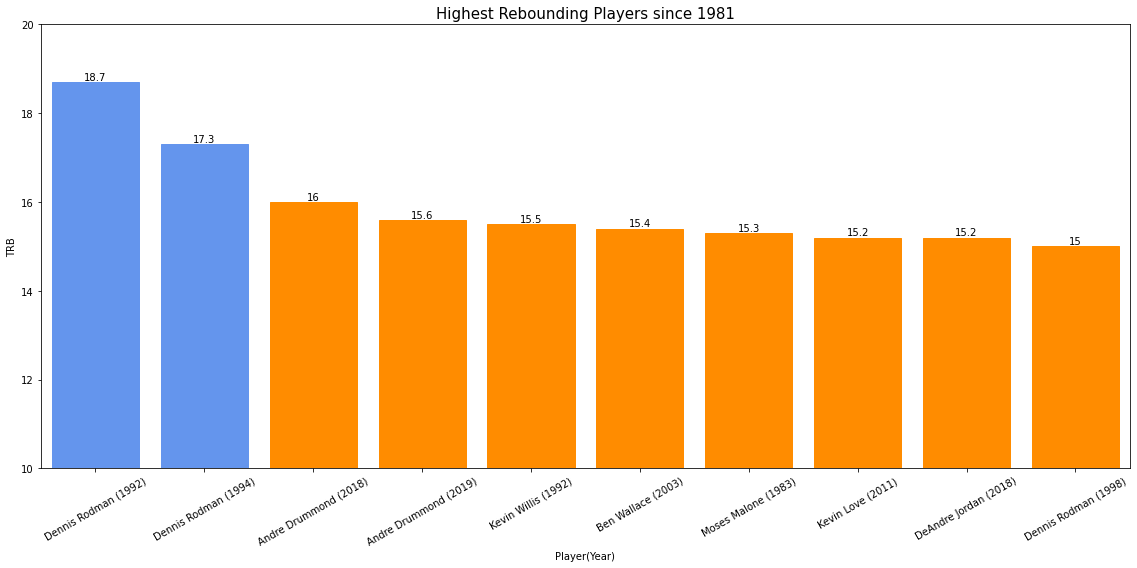

In [452]:
plt.figure(figsize = (16,8))
plt.title("Highest Rebounding Players since 1981",fontsize = 15)
plt.xticks(rotation=30)
plt.ylim(10, 20)
ax_5 = sns.barplot(data = highest_boards, x = "Player(Year)",y = "TRB")

for i in ax_5.containers:
    ax_5.bar_label(i, label_type= 'edge')
for bar in ax_5.patches:
    if bar.get_height()>17:
        bar.set_color('cornflowerblue')
    else:
        bar.set_color('darkorange')
plt.tight_layout()
plt.savefig('images/topboardsgetters.png');

In [127]:
advanced["Player"] = advanced['Player'].str.replace("*","", regex = False)

In [128]:
advanced.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar,C,33,LAL,80,2976,25.5,.616,.001,.379,7.6,21.5,15.0,13.6,0.9,4.0,12.8,26.3,9.6,4.6,14.3,.230,4.7,1.4,6.1,6.1,1981
1,2,Tom Abernethy,SF,26,TOT,39,298,8.0,.459,.017,.373,7.1,10.6,8.8,8.0,1.1,0.6,10.4,10.3,0.2,0.2,0.4,.062,-2.2,-0.4,-2.6,0.0,1981
2,2,Tom Abernethy,SF,26,GSW,10,39,3.2,.463,.000,1.000,2.8,20.2,11.4,2.9,1.2,0.0,31.6,6.4,0.0,0.0,0.0,-0.004,-4.4,0.0,-4.4,0.0,1981
3,2,Tom Abernethy,SF,26,IND,29,259,8.7,.458,.018,.339,7.8,9.1,8.4,8.8,1.1,0.7,8.5,10.9,0.2,0.2,0.4,.072,-1.9,-0.4,-2.4,0.0,1981
4,3,Alvan Adams,C,26,PHO,75,2054,20.3,.567,.000,.298,8.6,20.5,14.7,24.5,2.4,1.9,18.7,23.0,3.3,4.5,7.7,.180,2.5,2.6,5.1,3.7,1981


In [130]:
advanced[(advanced['Player'] == 'Player') & (advanced['Age']=="Age")]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
46,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,1981
69,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,1981
94,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,1981
119,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,1981
144,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22832,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022
22861,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022
22886,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022
22913,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022


In [131]:
index_dummy_strings = advanced[(advanced['Player'] == 'Player') & (advanced['Age']=="Age")].index

In [132]:
index_dummy_strings

Int64Index([   46,    69,    94,   119,   144,   171,   196,   221,   250,
              273,
            ...
            22689, 22710, 22737, 22765, 22795, 22832, 22861, 22886, 22913,
            22938],
           dtype='int64', length=836)

In [133]:
advanced.drop(index_dummy_strings,inplace=True)

In [134]:
advanced_single_row = advanced.groupby(["Player","Year"]).apply(single_row)

In [135]:
advanced_single_row.head()

Rk      Player Pos Age   Tm   G    MP   PER   TS%  \
Player     Year                                                            
A.C. Green 1986 2018   98  A.C. Green  PF  22  LAL  82  1542  11.8  .564   
           1987 2417  100  A.C. Green  PF  23  LAL  79  2240  15.7  .599   
           1988 2819  103  A.C. Green  PF  24  LAL  82  2636  14.5  .581   
           1989 3268  119  A.C. Green  PF  25  LAL  82  2510  17.8  .594   
           1990 3730  122  A.C. Green  PF  26  LAL  82  2709  14.7  .548   

                      3PAr   FTr  ORB%  DRB%  TRB% AST% STL% BLK%  TOV%  USG%  \
Player     Year                                                                 
A.C. Green 1986 2018  .015  .430  12.4  15.5  14.0  4.2  1.5  1.7  17.7  14.7   
           1987 2417  .009  .480  11.2  18.8  15.3  4.6  1.5  2.0  12.5  14.7   
           1988 2819  .003  .592  11.1  19.1  15.3  4.5  1.6  1.0  12.9  14.7   
           1989 3268  .022  .474  12.3  20.0  16.4  5.5  1.8  1.2  11.5  17.0   
           1990 3730  .057  .459  11.5  18.4  15.1  4.6  1.2  1.1  10.7  17.1   

                      OWS  DWS   WS WS/48  OBPM  DBPM   BPM VORP  Year  
Player     Year                                                         
A.C. Green 1986 2018  1.4  2.0  3.3  .103  -1.6   0.1  -1.6  0.2  1986  
           1987 2417  4.3  3.3  7.6  .163   0.9   0.1   1.0  1.7  1987  
           1988 2819  4.5  3.4  7.9  .144   0.4  -0.1   0.3  1.5  1988  
           1989 3268  5.8  3.5  9.4  .179   1.8  -0.2   1.6  2.3  1989  
           1990 3730  4.4  3.3  7.7  .137   0.3  -0.9  -0.6  1.0  1990

In [136]:
advanced_single_row.index = advanced_single_row.index.droplevel()
advanced_single_row.index = advanced_single_row.index.droplevel()

In [137]:
advanced_single_row.drop(columns='Rk',inplace = True)

In [138]:
advanced_single_row.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year'],
      dtype='object')

In [159]:
advanced_single_row.drop(columns=['Pos', 'Age', 'Tm', 'G'],inplace = True)

In [160]:
advanced_single_row.shape

(17959, 23)

In [161]:
all_stats.shape

(17960, 41)

In [162]:
advanced_all_stats = all_stats.merge(advanced_single_row, how = "left", on = ["Player", "Year"])

In [163]:
pd.set_option('display.max_columns',70)

In [164]:
advanced_all_stats.shape

(17960, 62)

In [165]:
advanced_all_stats

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MP_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,1542,11.8,.564,.015,.430,12.4,15.5,14.0,4.2,1.5,1.7,17.7,14.7,1.4,2.0,3.3,.103,-1.6,0.1,-1.6,0.2
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,2190,15.0,.550,.062,.178,3.0,6.6,4.9,10.2,1.8,0.4,9.4,21.7,3.2,2.0,5.2,.113,0.0,-0.3,-0.3,0.9
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,7.0,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,2454,20.4,.613,.012,.289,6.6,11.1,9.0,11.5,1.6,1.7,10.9,22.6,6.7,2.7,9.5,.185,3.5,0.3,3.9,3.6
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,NaN,2.0,3.0,0.667,0.667,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,3,37.7,.667,.000,.000,0.0,36.1,18.9,0.0,0.0,0.0,0.0,40.3,0.0,0.0,0.0,.349,3.4,0.2,3.6,0.0
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,135.0,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,2629,22.7,.603,.001,.328,6.0,14.2,10.3,15.7,1.2,2.7,11.7,26.6,7.6,3.2,10.8,.197,4.4,1.0,5.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17955,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,NaN,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,22,1.3,.357,.857,.000,0.0,15.7,7.9,0.0,0.0,0.0,0.0,14.5,0.0,0.0,0.0,-0.075,-6.3,-4.9,-11.2,-0.1
17956,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,1270,16.1,.515,.152,.346,5.4,20.2,12.7,7.5,1.5,3.5,7.8,21.4,0.4,1.9,2.3,.086,-1.0,0.4,-0.6,0.5
17957,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,562,14.0,.558,.409,.271,8.4,15.2,11.8,6.2,0.9,4.1,7.7,17.8,0.8,0.5,1.3,.113,-1.1,-0.9,-2.0,0.0
17958,Tony Snell,SG,25.0,MIL,80.0,80.0,29.2,3.1,6.8,0.455,1.8,4.4,0.406,1.3,2.3,0.548,0.588,0.6,0.7,0.810,0.3,2.8,3.1,1.2,0.7,0.2,0.7,1.6,8.5,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,2336,9.7,.603,.656,.107,1.1,11.1,6.2,5.9,1.2,0.5,8.8,12.1,2.1,1.3,3.4,.071,-1.0,-0.7,-1.7,0.2


In [171]:
george_null = advanced_all_stats[(advanced_all_stats['Player'] == 'George Johnson') & (advanced_all_stats['Pos']).isnull()].index

In [172]:
advanced_all_stats.drop(index=george_null,inplace = True)

In [174]:
advanced_all_stats.dtypes

Player     object
Pos        object
Age       float64
Tm         object
G         float64
           ...   
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
Length: 62, dtype: object

In [175]:
advanced_all_stats = advanced_all_stats.apply(pd.to_numeric, errors = 'ignore')

In [178]:
advanced_all_stats.dtypes

Player     object
Pos        object
Age       float64
Tm         object
G         float64
           ...   
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Length: 62, dtype: object

In [179]:
advanced_all_stats.to_csv("data/player_mvp_advanced_stats.csv", index=False)